In [1]:
#Lei assigned part
#Employee_Compensation  df
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
#import cleaned data
directory = 'C:/Users/N1110/Desktop/'

data_df = pd.read_csv(directory + 'EmpComp_Cleaned.csv')

## simple statistic 

Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison.  Explain why the statistics run are meaningful.

To get a quick summary of the attributes, we run the cell of codes below.  After that, we checked the data distribution overview of serval attributes of our interest. 

Since our target is 'Total Salary' based on our hypothesis, we checked the distribution of it first. The range of Total Salary is from 0 to  637457.58 in dollars with the median of 63487.825. From the data distribution plot of Total Salary, we see the data is right skewed and there are two peaks for the Total Salary at around 0 and 70,000 respectively. The two peaks case is also true for Total Benefits. However, Other Salaries only has one peak.

From the summary statistics table, we can see the attribute Overtime has the median value of zero which indicates most employee do not have any overtime at all. 

We found Organization Group to be a good class with reasonable number of subcategories for visualization, so we checked how many examples we have of each Organization Group to see if the data are balanced distributed. It turns out two of the groups Public Works, Transportation & Commerce and Community Health have much more data points than other groups.

We also checked how many examples we have of each Year to see if the data evenly distributed among the years. We may need to narrow down to one particular year for further analysis, so we want to have big enough sample size and want the observations to be representative. The data evenly distributed among the years 2013-2019, except for 2018 which has about double amount of data than other years.


In [3]:
#get quick summary of the attributes/variables
data_df.describe()

,Year,Organization Group Code,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,333594.000000,333594.000000,333594.000000,3.335940e+05,333594.000000,333594.000000,333594.00000,333594.000000,333594.000000,333594.000000,333594.000000,333594.000000,333594.000000
mean,2016.278533,3.326253,489.143159,3.135046e+06,58551.935150,4465.978568,3184.66733,66202.581048,11465.227851,8199.214953,4364.253009,24028.695813,90231.276861
std,1.971718,1.890964,332.360692,4.112551e+06,46890.418363,11514.751974,6864.34306,54437.160996,9816.015221,5577.656978,4061.664248,17784.555424,71108.386635
min,2013.000000,1.000000,0.000000,1.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,2.000000,236.000000,2.232800e+04,12491.620000,0.000000,0.00000,13834.705000,347.620000,1663.670000,906.397500,4248.077500,18735.662500
50%,2017.000000,3.000000,535.000000,4.485350e+04,58749.380000,0.000000,455.70000,63487.825000,11776.875000,11258.665000,3812.365000,28709.615000,92064.485000
75%,2018.000000,5.000000,790.000000,8.526791e+06,89696.372500,2632.737500,3421.11250,100250.495000,18141.842500,12801.790000,6712.492500,37510.747500,137930.022500
max,2019.000000,7.000000,990.000000,1.071014e+07,631952.710000,309897.200000,336726.34000,637457.580000,118296.720000,22270.120000,37198.600000,141920.270000,779377.850000


C:\Users\N1110\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


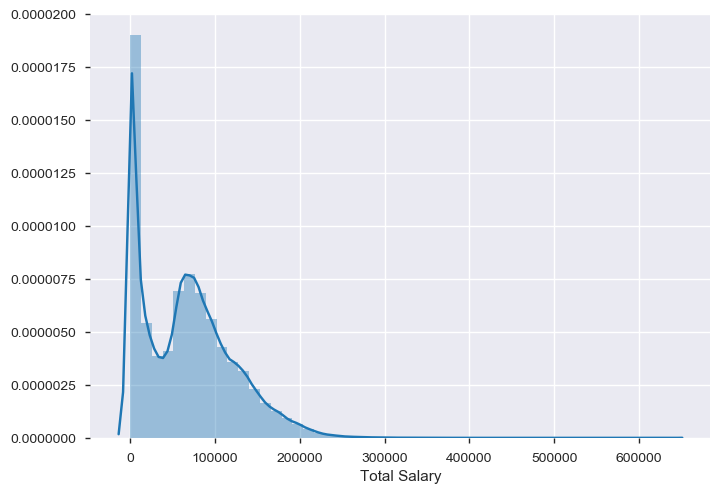

In [9]:
# Data Distribution
sns.distplot(data_df['Total Salary'])
plt.show()

C:\Users\N1110\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


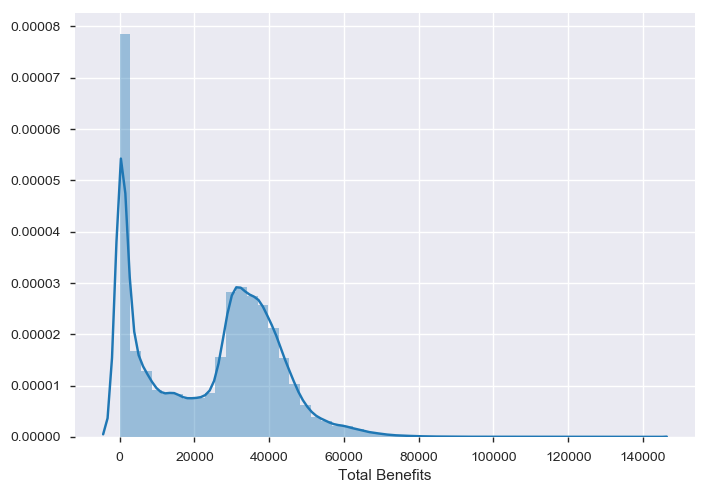

In [14]:
sns.distplot(data_df['Total Benefits'])
plt.show()

C:\Users\N1110\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


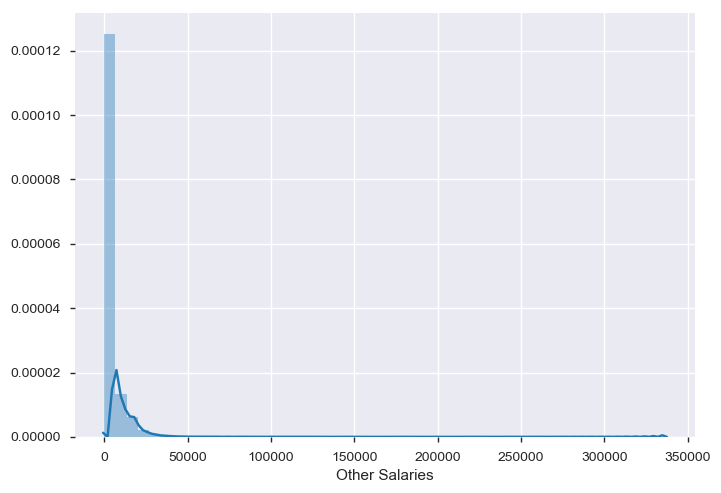

In [12]:
sns.distplot(data_df['Other Salaries'])
plt.show()

In [5]:
# Let's see how many examples we have of each Organization Group
data_df["Organization Group"].value_counts()

Public Works, Transportation & Commerce     96231
Community Health                            65625
Public Protection                           58744
General City Responsibilities               29203
Culture & Recreation                        28041
General Administration & Finance            28012
Human Welfare & Neighborhood Development    27738
Name: Organization Group, dtype: int64

In [6]:
data_df["Organization Group Code"].value_counts()

2    96231
4    65625
1    58744
7    29203
5    28041
6    28012
3    27738
Name: Organization Group Code, dtype: int64

In [7]:
# Let's see how many examples we have of each Year
data_df["Year"].value_counts()

2018    74589
2019    46665
2017    45610
2016    44011
2015    42907
2014    40477
2013    39335
Name: Year, dtype: int64

## Explore Joint Attributes
Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

From the pearson correlation matrix plot in pandas_profiling, we found Total Salary, Slaries and Total Compensation to be highly correlated, so we only keep Total Salary.

After remove highly correlated varaibles and create a reduced dataset, we run sns.pairplot to show the bivariate relation between each pair of features and color coded by Organization Group Code.

we also plot Overtime vs Organization Group Code to see which Organization Group has most overtime.  The result shows that Group 1 which is Public Protection group has most overtime.

In [4]:
import pandas_profiling
pandas_profiling.ProfileReport(data_df)

C:\Users\N1110\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\N1110\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\N1110\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\N1110\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\N1110\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\N1110\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\N11

Number of variables,22
Number of observations,333594
Total Missing (%),0.5%
Total size in memory,56.0 MiB
Average record size in memory,176.0 B
Numeric,9
Categorical,8
Boolean,0
Date,0
Text (Unique),0
Rejected,5


In [26]:
#remove highly correlated varaibles and create a reduced dataset
#rm redudant
data_df2=data_df
data_df2.drop(['Year Type', 'Department Code', 'Department', 'Union Code',
'Job Family Code', 'Job Code'], axis=1, inplace=True)

data_df.Reduced=data_df2
data_df.Reduced.drop(['Year', 'Organization Group', 'Union', 'Job Family', 'Job','Employee Identifier','Salaries','Total Compensation','Other Benefits'], axis=1, inplace=True)
data_df.Reduced.head()

C:\Users\N1110\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


,Organization Group Code,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Total Benefits
0,4,0.00,1476.25,15196.96,0.00,0.00,742.05
1,2,0.00,0.00,53482.11,6519.94,12425.04,23166.55
2,3,0.00,11784.73,19875.33,1598.95,0.00,3177.18
3,4,164.13,3392.92,109367.20,0.00,0.00,8145.35
4,4,0.00,0.00,77722.51,13963.56,0.00,27834.25


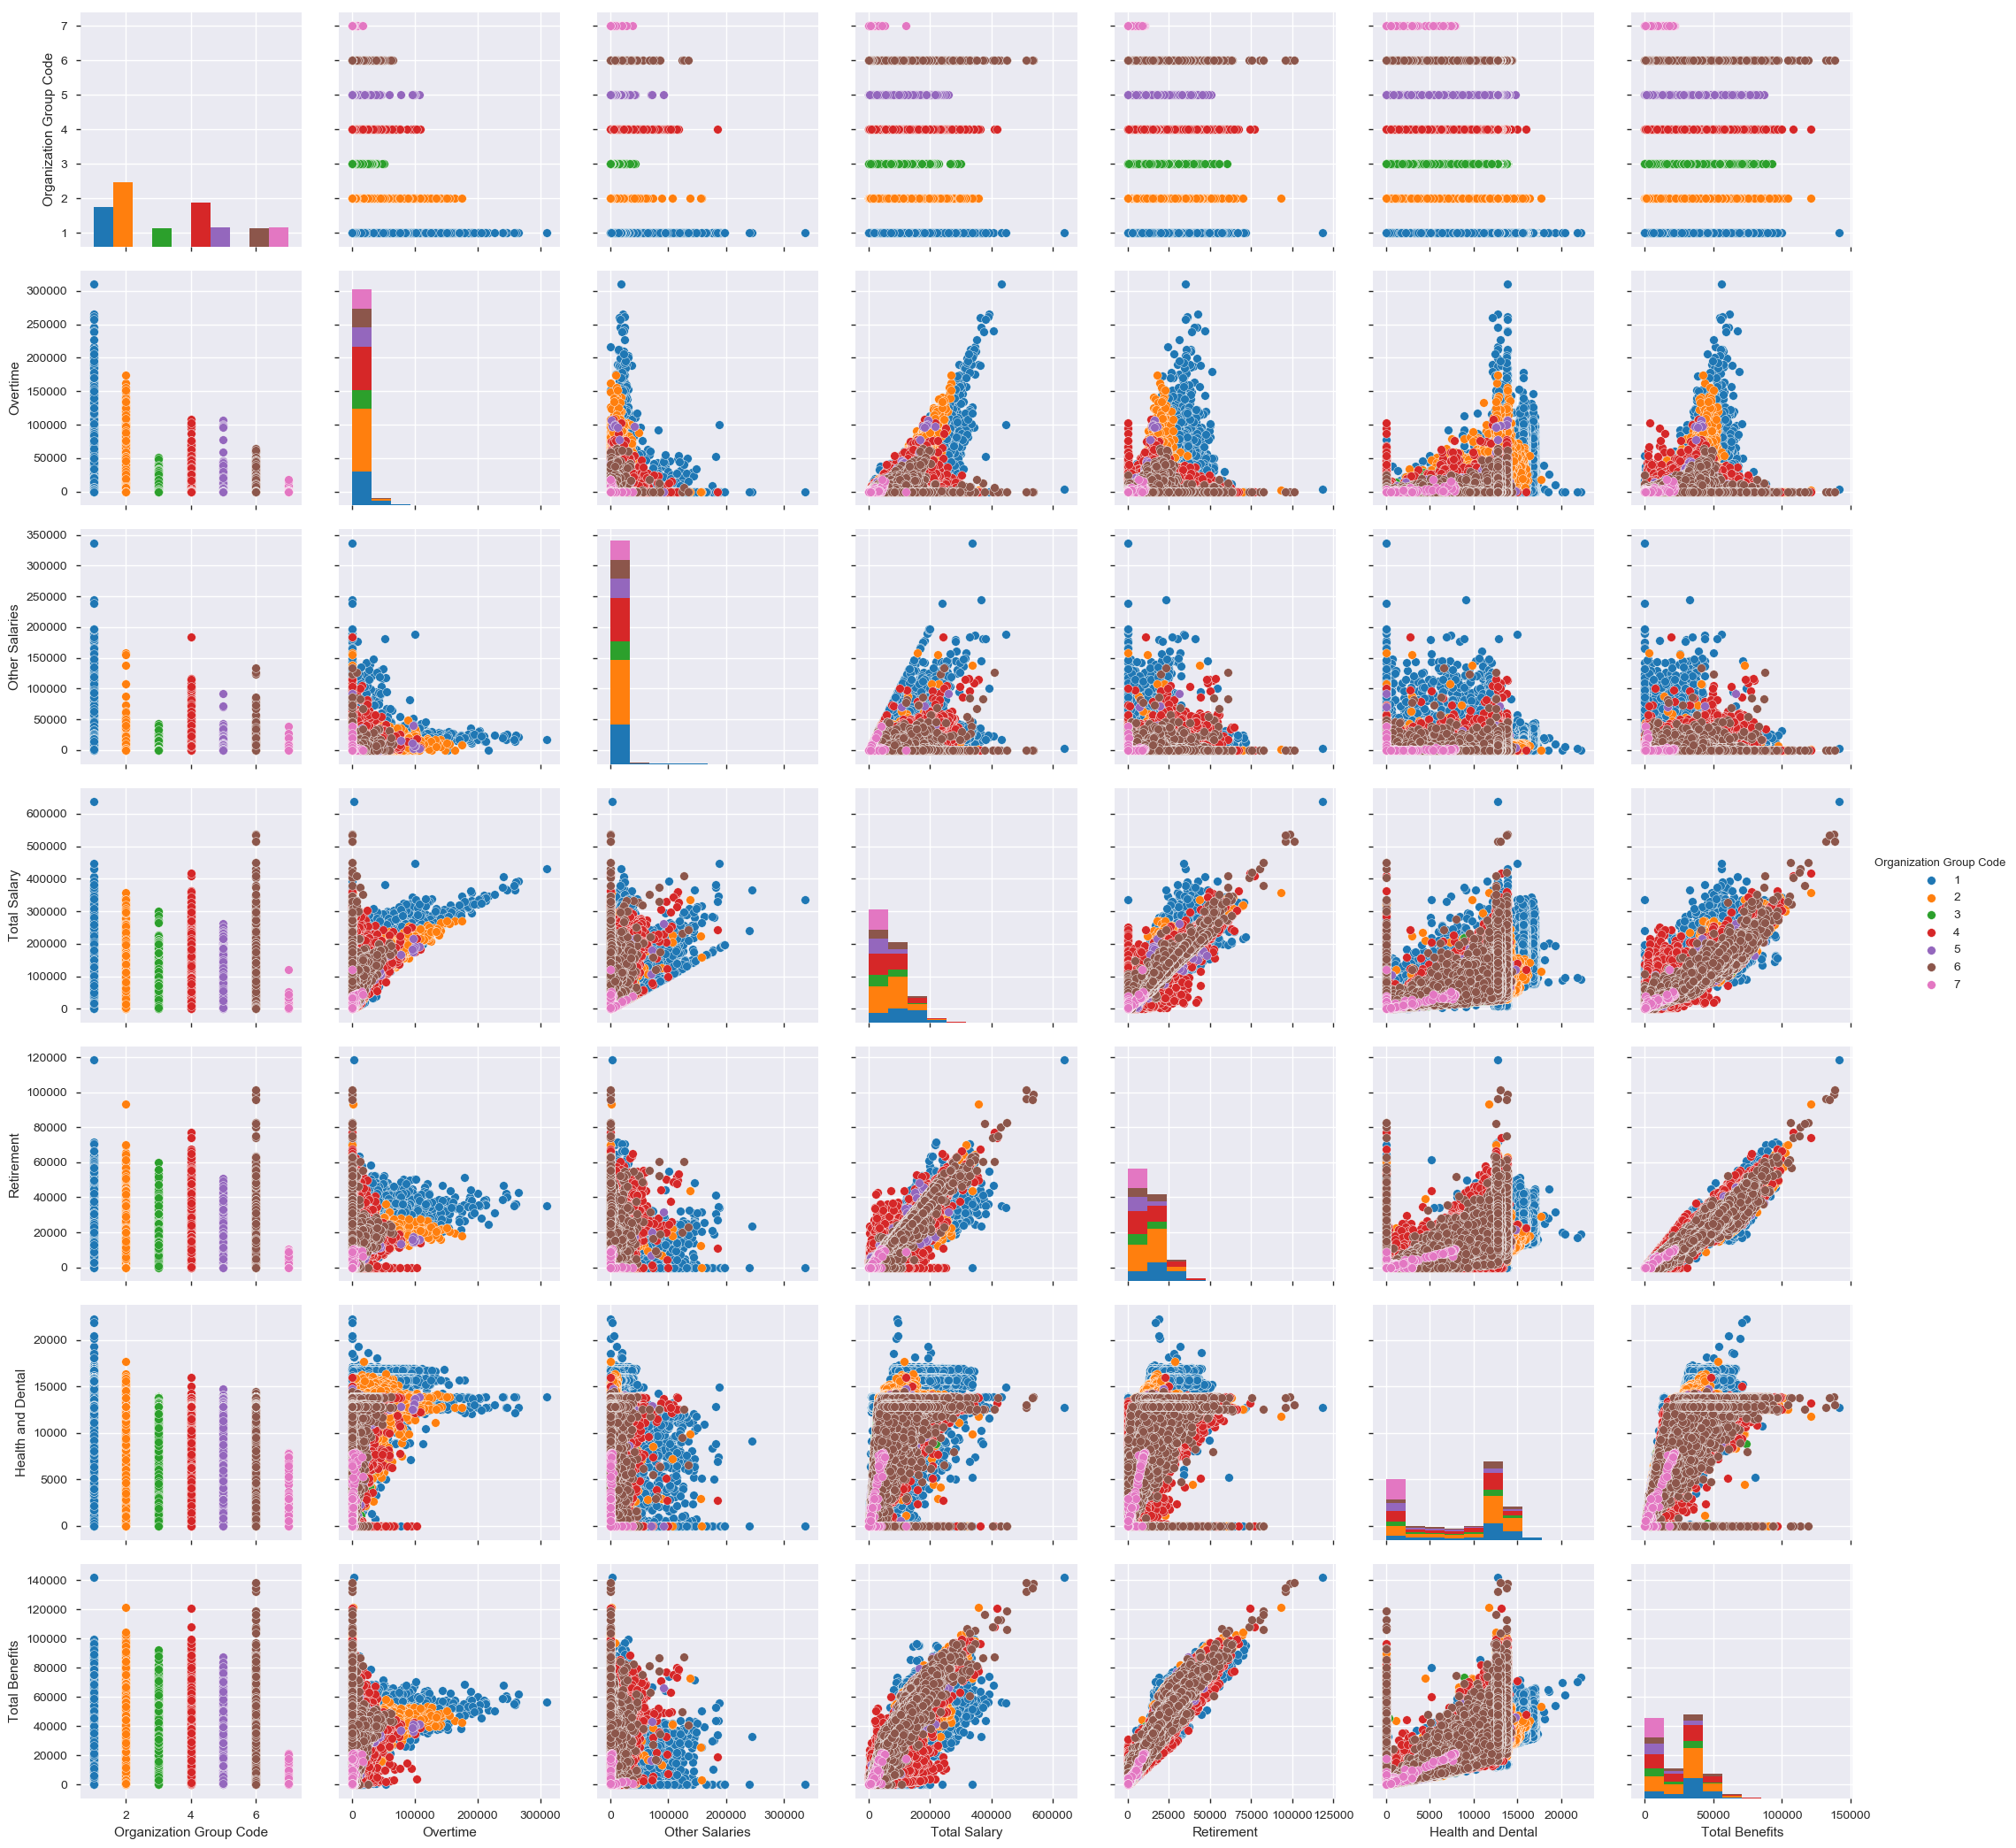

In [19]:
#sns.pairplot
sns.pairplot(data_df.Reduced, hue="Organization Group Code", size=3)

In [27]:
data_df2.dtypes

Organization Group Code      int64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Total Benefits             float64
dtype: object

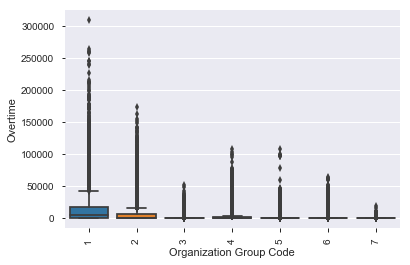

In [28]:
#which Organization Group has most overtime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x="Organization Group Code", y="Overtime", data=data_df2)
plt.xticks(rotation = 90)

plt.show()


## Explore Attributes and Class

Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

We plot target varaible 'Total Salary' vs other varaibles in this section. From the boxplot of Total Salary vs Organization Group, Public Protection group has the highest Total Salary.

To take a look on the data distribution, we want to create a violin plot of Total Salary vs Organization Group. However, might due to overplot, the violin plot with all years did not look good. So we subset the data to 2019 only data for this violin plot. From the violin plot, most groups have two peaks on the 

In addition, from the sns.pairplot we found the Total Salary to be linearly correlated to Retirement and Total Benefits.


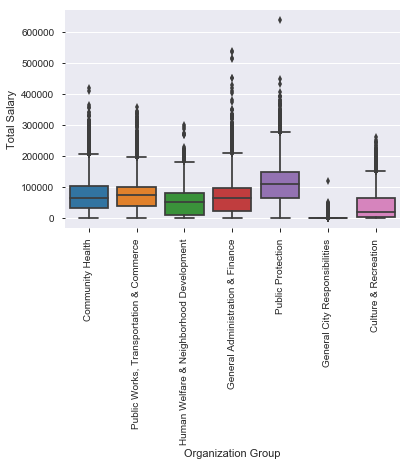

In [34]:
# We can look at an individual feature in Seaborn through a boxplot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x="Organization Group", y="Total Salary", data=data_df)
plt.xticks(rotation = 90)

plt.show()

In [35]:
#subset only 2019 data
data_df2019= data_df[data_df.Year == 2019]
data_df2019.head()

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,Fiscal,2019,4,Community Health,DPH,DPH Public Health,791.0,"SEIU, Local 1021, RN",2300,Nursing,...,8592281,13720.71,0.00,1476.25,15196.96,0.00,0.00,742.05,742.05,15939.01
1,Fiscal,2019,2,"Public Works, Transportation & Commerce",DPW,DPW GSA - Public Works,21.0,"Prof & Tech Eng, Local 21",5300,Sub-Professional Engineering,...,8548329,53482.11,0.00,0.00,53482.11,6519.94,12425.04,4221.57,23166.55,76648.66
2,Fiscal,2019,3,Human Welfare & Neighborhood Development,HSA,NaN,164.0,"Physician/Dentists 8-CC, UAPD",2200,Medical & Dental,...,8555308,8090.60,0.00,11784.73,19875.33,1598.95,0.00,1578.23,3177.18,23052.51
3,Fiscal,2019,4,Community Health,DPH,DPH Public Health,791.0,"SEIU, Local 1021, RN",2300,Nursing,...,8567365,105810.15,164.13,3392.92,109367.20,0.00,0.00,8145.35,8145.35,117512.55
4,Fiscal,2019,4,Community Health,DPH,DPH Public Health,351.0,"Municipal Exec Assoc, Misc",0900,Management,...,8532522,77722.51,0.00,0.00,77722.51,13963.56,0.00,13870.69,27834.25,105556.76


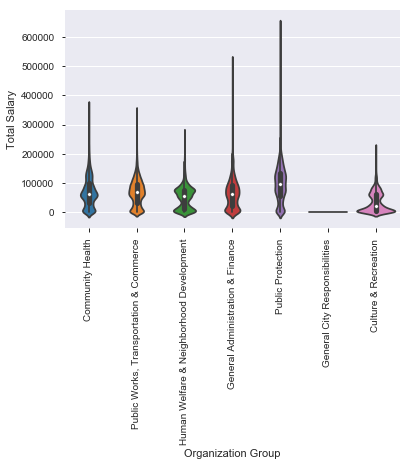

In [36]:
# A violin plot Organization Group  Code in year 2019
#df2019 only 2019 data
import seaborn as sns
sns.violinplot(x="Organization Group", y="Total Salary", data=data_df2019, size=10)

plt.xticks(rotation = 90)

plt.show()